<div align="center">

###### Lab 2

# National Tsing Hua University

#### Spring 2025

#### 11320IEEM 513600

#### Deep Learning and Industrial Applications
    
## Lab 2: Predicting Heart Disease with Deep Learning

</div>

### Introduction

In the realm of healthcare, early detection and accurate prediction of diseases play a crucial role in patient care and management. Heart disease remains one of the leading causes of mortality worldwide, making the development of effective diagnostic tools essential. This lab leverages deep learning to predict the presence of heart disease in patients using a subset of 14 key attributes from the Cleveland Heart Disease Database. The objective is to explore and apply deep learning techniques to distinguish between the presence and absence of heart disease based on clinical parameters.

Throughout this lab, you'll engage with the following key activities:
- Use [Pandas](https://pandas.pydata.org) to process the CSV files.
- Use [PyTorch](https://pytorch.org) to build an Artificial Neural Network (ANN) to fit the dataset.
- Evaluate the performance of the trained model to understand its accuracy.

### Attribute Information

1. age: Age of the patient in years
2. sex: (Male/Female)
3. cp: Chest pain type (4 types: low, medium, high, and severe)
4. trestbps: Resting blood pressure
5. chol: Serum cholesterol in mg/dl
6. fbs: Fasting blood sugar > 120 mg/dl
7. restecg: Resting electrocardiographic results (values 0,1,2)
8. thalach: Maximum heart rate achieved
9. exang: Exercise induced angina
10. oldpeak: Oldpeak = ST depression induced by exercise relative to rest
11. slope: The slope of the peak exercise ST segment
12. ca: Number of major vessels (0-3) colored by fluoroscopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversible defect
14. target: target have disease or not (1=yes, 0=no)

### References
- [UCI Heart Disease Data](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data) for the dataset we use in this lab.


## A. Checking and Preprocessing

In [3]:
import pandas as pd

df = pd.read_csv('heart_dataset_train_all.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,41,Male,medium,105.0,198.0,0,1.0,168.0,0,0.0,2.0,1,2.0,1.0
1,65,Female,low,120.0,177.0,0,1.0,140.0,0,0.4,2.0,0,3.0,1.0
2,44,Female,medium,130.0,219.0,0,0.0,188.0,0,0.0,2.0,0,2.0,1.0
3,54,Female,high,125.0,273.0,0,0.0,152.0,0,0.5,0.0,1,2.0,1.0
4,51,Female,severe,125.0,213.0,0,0.0,125.0,1,1.4,2.0,1,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,40,Female,low,110.0,167.0,0,0.0,114.0,1,2.0,1.0,0,3.0,0.0
269,60,Female,low,117.0,230.0,1,1.0,160.0,1,1.4,2.0,2,3.0,0.0
270,64,Female,high,140.0,335.0,0,1.0,158.0,0,0.0,2.0,0,2.0,0.0
271,43,Female,low,120.0,177.0,0,0.0,120.0,1,2.5,1.0,0,3.0,0.0


In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       273 non-null    int64  
 1   sex       272 non-null    object 
 2   cp        272 non-null    object 
 3   trestbps  272 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       273 non-null    int64  
 6   restecg   272 non-null    float64
 7   thalach   272 non-null    float64
 8   exang     273 non-null    int64  
 9   oldpeak   273 non-null    float64
 10  slope     271 non-null    float64
 11  ca        273 non-null    int64  
 12  thal      272 non-null    float64
 13  target    272 non-null    float64
dtypes: float64(8), int64(4), object(2)
memory usage: 30.0+ KB


In [6]:
# checking for null values
df.isnull().sum()

age         0
sex         1
cp          1
trestbps    1
chol        2
fbs         0
restecg     1
thalach     1
exang       0
oldpeak     0
slope       2
ca          0
thal        1
target      1
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.shape

(270, 14)

In [9]:
# Mapping 'sex' descriptions to numbers
sex_description = {
    'Male': 0,
    'Female': 1,
}
df.loc[:, 'sex'] = df['sex'].map(sex_description)

# Mapping 'cp' (chest pain) descriptions to numbers
pain_description = {
    'low': 0,
    'medium': 1,
    'high': 2,
    'severe': 3
}
df.loc[:, 'cp'] = df['cp'].map(pain_description)

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,41,0,1,105.0,198.0,0,1.0,168.0,0,0.0,2.0,1,2.0,1.0
1,65,1,0,120.0,177.0,0,1.0,140.0,0,0.4,2.0,0,3.0,1.0
2,44,1,1,130.0,219.0,0,0.0,188.0,0,0.0,2.0,0,2.0,1.0
3,54,1,2,125.0,273.0,0,0.0,152.0,0,0.5,0.0,1,2.0,1.0
4,51,1,3,125.0,213.0,0,0.0,125.0,1,1.4,2.0,1,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,40,1,0,110.0,167.0,0,0.0,114.0,1,2.0,1.0,0,3.0,0.0
269,60,1,0,117.0,230.0,1,1.0,160.0,1,1.4,2.0,2,3.0,0.0
270,64,1,2,140.0,335.0,0,1.0,158.0,0,0.0,2.0,0,2.0,0.0
271,43,1,0,120.0,177.0,0,0.0,120.0,1,2.5,1.0,0,3.0,0.0


In [10]:
df.describe()

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.385185,131.525926,245.607407,0.151852,0.522222,149.807407,0.333333,1.024074,1.400000,0.744444,2.300000,0.544444
std,9.149713,17.904675,51.529411,0.359544,0.529314,23.217253,0.472280,1.188379,0.618188,1.037166,0.623874,0.498946
min,29.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.250000,120.000000,210.250000,0.000000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,140.000000,274.000000,0.000000,1.000000,167.750000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.062222,-0.103697,0.261782,0.210520,0.109847,-0.124588,-0.412624,0.111263,0.200243,-0.165360,0.254462,0.077368,-0.244798
sex,-0.062222,1.000000,-0.040197,-0.055463,-0.166885,0.042384,-0.069599,-0.058626,0.124054,0.089726,-0.038771,0.140795,0.198493,-0.283776
cp,-0.103697,-0.040197,1.000000,0.035563,-0.063592,0.065869,0.008389,0.300307,-0.428233,-0.183616,0.135174,-0.180598,-0.139765,0.425574
trestbps,0.261782,-0.055463,0.035563,1.000000,0.128444,0.170606,-0.145195,-0.056631,0.067116,0.184896,-0.126553,0.093545,0.068690,-0.173239
chol,0.210520,-0.166885,-0.063592,0.128444,1.000000,0.003430,-0.162687,-0.023753,0.063902,0.084355,-0.031929,0.068647,0.121280,-0.096773
fbs,0.109847,0.042384,0.065869,0.170606,0.003430,1.000000,-0.086165,-0.014297,0.029190,0.007943,-0.056866,0.164266,-0.004972,-0.068845
restecg,-0.124588,-0.069599,0.008389,-0.145195,-0.162687,-0.086165,1.000000,0.025457,-0.089225,-0.047837,0.074982,-0.053946,-0.003377,0.101817
thalach,-0.412624,-0.058626,0.300307,-0.056631,-0.023753,-0.014297,0.025457,1.000000,-0.404349,-0.340564,0.370073,-0.205060,-0.078637,0.432687
exang,0.111263,0.124054,-0.428233,0.067116,0.063902,0.029190,-0.089225,-0.404349,1.000000,0.294308,-0.280124,0.106250,0.189253,-0.457502
oldpeak,0.200243,0.089726,-0.183616,0.184896,0.084355,0.007943,-0.047837,-0.340564,0.294308,1.000000,-0.585472,0.223375,0.200315,-0.443504


#### Converting the DataFrame to a NumPy Array

In [12]:
import numpy as np

np_data = df.values
np_data.shape

(270, 14)

In [13]:
split_point = int(np_data.shape[0]*0.7)

np.random.shuffle(np_data)

x_train = np_data[:split_point, :13]
y_train = np_data[:split_point, 13]
x_val = np_data[split_point:, :13]
y_val = np_data[split_point:, 13]

In [14]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Convert to PyTorch tensors
x_train = np.array(x_train, dtype=float)
x_train = torch.from_numpy(x_train).float()
y_train = np.array(y_train, dtype=int)
y_train = torch.from_numpy(y_train).long()

x_val = np.array(x_val, dtype=float)
x_val = torch.from_numpy(x_val).float()
y_val = np.array(y_val, dtype=int)
y_val = torch.from_numpy(y_val).long()

batch_size = 32

# Create datasets
train_dataset = TensorDataset(x_train, y_train)
val_dataset = TensorDataset(x_val, y_val)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

print(f'Number of samples in train and validation are {len(train_loader.dataset)} and {len(val_loader.dataset)}.')

Number of samples in train and validation are 189 and 81.


## B. Defining Neural Networks

In PyTorch, we can use **class** to define our custom neural network architectures by subclassing the `nn.Module` class. This gives our neural network all the functionality it needs to work with PyTorch's other utilities and keeps our implementation organized.

- Neural networks are defined by subclassing `nn.Module`.
- The layers of the neural network are initialized in the `__init__` method.
- The forward pass operations on input data are defined in the `forward` method.

It's worth noting that while we only define the forward pass, PyTorch will automatically derive the backward pass for us, which is used during training to update the model's weights."

In [67]:
import torch.nn as nn

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(13, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 2)
        ).cuda()

    def forward(self, x):
        return self.model(x)

## C. Training the Neural Network

In [15]:
# Check your GPU status.
!nvidia-smi

Thu Mar 27 02:14:54 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.94                 Driver Version: 560.94         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060 Ti   WDDM  |   00000000:01:00.0  On |                  N/A |
| 46%   54C    P0             56W /  240W |    3243MiB /   8192MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [69]:
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR, StepLR
from tqdm.auto import tqdm

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

epochs = 100

model = Model()
# print(model)

best_val_loss = float('inf')
best_val_acc = -1

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
lr_scheduler = CosineAnnealingLR(optimizer, T_max=epochs, eta_min=0)

for epoch in tqdm(range(epochs)):
    # Training
    model.train()
    total_loss = 0.0
    train_correct = 0
    total_train_samples = 0

    for features, labels in train_loader:
        features = features.cuda()
        labels = labels.cuda()

        outputs = model(features)

        loss = criterion(outputs, labels)
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_predicted = outputs.argmax(-1)
        train_correct += (train_predicted == labels).sum().item()
        total_train_samples += labels.size(0)

    # Learning rate update
    lr_scheduler.step()

    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = 100. * train_correct / total_train_samples

    # Validation
    model.eval()
    total_val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for features, labels in val_loader:
            features = features.cuda()
            labels = labels.cuda()

            outputs = model(features)

            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

            predicted = outputs.argmax(-1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    avg_val_loss = total_val_loss / len(val_loader)
    val_accuracy = 100. * correct / total

    # Checkpoint
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss

    if val_accuracy > best_val_acc:
        best_val_acc = val_accuracy
        torch.save(model.state_dict(), 'model_classification.pth')

    print(f'Epoch {epoch+1}/{epochs}, Train loss: {avg_train_loss:.4f}, Train acc: {train_accuracy:.4f}%, Val loss: {avg_val_loss:.4f}, Val acc: {val_accuracy:.4f}%, Best Val loss: {best_val_loss:.4f} Best Val acc: {best_val_acc:.2f}%')

    # Store performance
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/100, Train loss: 3.3492, Train acc: 54.4974%, Val loss: 3.6802, Val acc: 49.3827%, Best Val loss: 3.6802 Best Val acc: 49.38%
Epoch 2/100, Train loss: 2.2970, Train acc: 52.9101%, Val loss: 1.2221, Val acc: 59.2593%, Best Val loss: 1.2221 Best Val acc: 59.26%
Epoch 3/100, Train loss: 1.6298, Train acc: 57.6720%, Val loss: 2.6645, Val acc: 50.6173%, Best Val loss: 1.2221 Best Val acc: 59.26%


  5%|▌         | 5/100 [00:00<00:02, 46.86it/s]

Epoch 4/100, Train loss: 1.2137, Train acc: 62.4339%, Val loss: 0.9878, Val acc: 65.4321%, Best Val loss: 0.9878 Best Val acc: 65.43%
Epoch 5/100, Train loss: 0.9181, Train acc: 69.8413%, Val loss: 1.4979, Val acc: 56.7901%, Best Val loss: 0.9878 Best Val acc: 65.43%
Epoch 6/100, Train loss: 1.1884, Train acc: 61.9048%, Val loss: 1.3094, Val acc: 56.7901%, Best Val loss: 0.9878 Best Val acc: 65.43%
Epoch 7/100, Train loss: 0.7575, Train acc: 74.6032%, Val loss: 1.1345, Val acc: 59.2593%, Best Val loss: 0.9878 Best Val acc: 65.43%
Epoch 8/100, Train loss: 0.6933, Train acc: 71.9577%, Val loss: 1.0740, Val acc: 60.4938%, Best Val loss: 0.9878 Best Val acc: 65.43%
Epoch 9/100, Train loss: 0.7063, Train acc: 69.8413%, Val loss: 0.8938, Val acc: 62.9630%, Best Val loss: 0.8938 Best Val acc: 65.43%


 10%|█         | 10/100 [00:00<00:01, 48.47it/s]

Epoch 10/100, Train loss: 0.6775, Train acc: 73.0159%, Val loss: 1.1119, Val acc: 58.0247%, Best Val loss: 0.8938 Best Val acc: 65.43%
Epoch 11/100, Train loss: 0.6105, Train acc: 71.4286%, Val loss: 0.8405, Val acc: 59.2593%, Best Val loss: 0.8405 Best Val acc: 65.43%
Epoch 12/100, Train loss: 0.5226, Train acc: 74.6032%, Val loss: 0.7319, Val acc: 60.4938%, Best Val loss: 0.7319 Best Val acc: 65.43%
Epoch 13/100, Train loss: 0.5214, Train acc: 70.8995%, Val loss: 0.6903, Val acc: 64.1975%, Best Val loss: 0.6903 Best Val acc: 65.43%


 21%|██        | 21/100 [00:00<00:01, 49.99it/s]

Epoch 14/100, Train loss: 0.5226, Train acc: 69.8413%, Val loss: 0.6752, Val acc: 62.9630%, Best Val loss: 0.6752 Best Val acc: 65.43%
Epoch 15/100, Train loss: 0.4981, Train acc: 73.0159%, Val loss: 0.6536, Val acc: 65.4321%, Best Val loss: 0.6536 Best Val acc: 65.43%
Epoch 16/100, Train loss: 0.5340, Train acc: 72.4868%, Val loss: 0.6541, Val acc: 64.1975%, Best Val loss: 0.6536 Best Val acc: 65.43%
Epoch 17/100, Train loss: 0.5668, Train acc: 70.8995%, Val loss: 0.6487, Val acc: 67.9012%, Best Val loss: 0.6487 Best Val acc: 67.90%
Epoch 18/100, Train loss: 0.4950, Train acc: 74.6032%, Val loss: 0.8118, Val acc: 60.4938%, Best Val loss: 0.6487 Best Val acc: 67.90%
Epoch 19/100, Train loss: 0.5845, Train acc: 68.7831%, Val loss: 0.9232, Val acc: 58.0247%, Best Val loss: 0.6487 Best Val acc: 67.90%
Epoch 20/100, Train loss: 0.5858, Train acc: 74.0741%, Val loss: 0.8920, Val acc: 59.2593%, Best Val loss: 0.6487 Best Val acc: 67.90%
Epoch 21/100, Train loss: 0.5148, Train acc: 74.6032%, 

 31%|███       | 31/100 [00:00<00:01, 48.75it/s]

Epoch 25/100, Train loss: 0.4669, Train acc: 75.1323%, Val loss: 0.6527, Val acc: 69.1358%, Best Val loss: 0.6487 Best Val acc: 69.14%
Epoch 26/100, Train loss: 0.4713, Train acc: 77.2487%, Val loss: 0.6419, Val acc: 66.6667%, Best Val loss: 0.6419 Best Val acc: 69.14%
Epoch 27/100, Train loss: 0.5222, Train acc: 71.4286%, Val loss: 0.6438, Val acc: 70.3704%, Best Val loss: 0.6419 Best Val acc: 70.37%
Epoch 28/100, Train loss: 0.4550, Train acc: 74.6032%, Val loss: 0.6606, Val acc: 70.3704%, Best Val loss: 0.6419 Best Val acc: 70.37%
Epoch 29/100, Train loss: 0.4841, Train acc: 76.7196%, Val loss: 0.7253, Val acc: 62.9630%, Best Val loss: 0.6419 Best Val acc: 70.37%
Epoch 30/100, Train loss: 0.5481, Train acc: 73.5450%, Val loss: 0.8162, Val acc: 64.1975%, Best Val loss: 0.6419 Best Val acc: 70.37%
Epoch 31/100, Train loss: 0.4551, Train acc: 75.1323%, Val loss: 0.7448, Val acc: 61.7284%, Best Val loss: 0.6419 Best Val acc: 70.37%
Epoch 32/100, Train loss: 0.4402, Train acc: 78.8360%, 

 37%|███▋      | 37/100 [00:00<00:01, 49.68it/s]

Epoch 36/100, Train loss: 0.4832, Train acc: 73.5450%, Val loss: 0.5884, Val acc: 69.1358%, Best Val loss: 0.5884 Best Val acc: 72.84%
Epoch 37/100, Train loss: 0.4477, Train acc: 80.4233%, Val loss: 0.6027, Val acc: 69.1358%, Best Val loss: 0.5884 Best Val acc: 72.84%
Epoch 38/100, Train loss: 0.4539, Train acc: 77.7778%, Val loss: 0.6281, Val acc: 62.9630%, Best Val loss: 0.5884 Best Val acc: 72.84%
Epoch 39/100, Train loss: 0.4466, Train acc: 79.8942%, Val loss: 0.6190, Val acc: 61.7284%, Best Val loss: 0.5884 Best Val acc: 72.84%
Epoch 40/100, Train loss: 0.4076, Train acc: 81.4815%, Val loss: 0.5895, Val acc: 72.8395%, Best Val loss: 0.5884 Best Val acc: 72.84%
Epoch 41/100, Train loss: 0.4484, Train acc: 79.3651%, Val loss: 0.6028, Val acc: 71.6049%, Best Val loss: 0.5884 Best Val acc: 72.84%


 43%|████▎     | 43/100 [00:00<00:01, 50.26it/s]

Epoch 42/100, Train loss: 0.3995, Train acc: 85.1852%, Val loss: 0.5893, Val acc: 71.6049%, Best Val loss: 0.5884 Best Val acc: 72.84%
Epoch 43/100, Train loss: 0.4116, Train acc: 82.5397%, Val loss: 0.6190, Val acc: 72.8395%, Best Val loss: 0.5884 Best Val acc: 72.84%
Epoch 44/100, Train loss: 0.4234, Train acc: 81.4815%, Val loss: 0.5826, Val acc: 74.0741%, Best Val loss: 0.5826 Best Val acc: 74.07%
Epoch 45/100, Train loss: 0.4114, Train acc: 79.8942%, Val loss: 0.5945, Val acc: 70.3704%, Best Val loss: 0.5826 Best Val acc: 74.07%
Epoch 46/100, Train loss: 0.4115, Train acc: 80.9524%, Val loss: 0.6074, Val acc: 72.8395%, Best Val loss: 0.5826 Best Val acc: 74.07%


 49%|████▉     | 49/100 [00:00<00:01, 50.69it/s]

Epoch 47/100, Train loss: 0.3840, Train acc: 83.5979%, Val loss: 0.5964, Val acc: 74.0741%, Best Val loss: 0.5826 Best Val acc: 74.07%
Epoch 48/100, Train loss: 0.4025, Train acc: 82.0106%, Val loss: 0.6314, Val acc: 72.8395%, Best Val loss: 0.5826 Best Val acc: 74.07%
Epoch 49/100, Train loss: 0.4484, Train acc: 79.3651%, Val loss: 0.7798, Val acc: 62.9630%, Best Val loss: 0.5826 Best Val acc: 74.07%
Epoch 50/100, Train loss: 0.4629, Train acc: 75.1323%, Val loss: 0.6130, Val acc: 67.9012%, Best Val loss: 0.5826 Best Val acc: 74.07%
Epoch 51/100, Train loss: 0.4410, Train acc: 79.3651%, Val loss: 0.6165, Val acc: 69.1358%, Best Val loss: 0.5826 Best Val acc: 74.07%
Epoch 52/100, Train loss: 0.3922, Train acc: 84.1270%, Val loss: 0.5665, Val acc: 74.0741%, Best Val loss: 0.5665 Best Val acc: 74.07%
Epoch 53/100, Train loss: 0.3848, Train acc: 84.6561%, Val loss: 0.5572, Val acc: 72.8395%, Best Val loss: 0.5572 Best Val acc: 74.07%


 55%|█████▌    | 55/100 [00:01<00:00, 49.97it/s]

Epoch 54/100, Train loss: 0.3704, Train acc: 84.6561%, Val loss: 0.5629, Val acc: 71.6049%, Best Val loss: 0.5572 Best Val acc: 74.07%
Epoch 55/100, Train loss: 0.3751, Train acc: 86.7725%, Val loss: 0.5685, Val acc: 71.6049%, Best Val loss: 0.5572 Best Val acc: 74.07%
Epoch 56/100, Train loss: 0.3798, Train acc: 84.1270%, Val loss: 0.5572, Val acc: 72.8395%, Best Val loss: 0.5572 Best Val acc: 74.07%
Epoch 57/100, Train loss: 0.3620, Train acc: 86.7725%, Val loss: 0.5858, Val acc: 74.0741%, Best Val loss: 0.5572 Best Val acc: 74.07%
Epoch 58/100, Train loss: 0.3694, Train acc: 85.1852%, Val loss: 0.5532, Val acc: 72.8395%, Best Val loss: 0.5532 Best Val acc: 74.07%


 61%|██████    | 61/100 [00:01<00:00, 51.50it/s]

Epoch 59/100, Train loss: 0.3885, Train acc: 84.6561%, Val loss: 0.6318, Val acc: 74.0741%, Best Val loss: 0.5532 Best Val acc: 74.07%
Epoch 60/100, Train loss: 0.3751, Train acc: 85.1852%, Val loss: 0.5777, Val acc: 72.8395%, Best Val loss: 0.5532 Best Val acc: 74.07%
Epoch 61/100, Train loss: 0.3667, Train acc: 85.1852%, Val loss: 0.5572, Val acc: 72.8395%, Best Val loss: 0.5532 Best Val acc: 74.07%
Epoch 62/100, Train loss: 0.3656, Train acc: 85.7143%, Val loss: 0.5641, Val acc: 69.1358%, Best Val loss: 0.5532 Best Val acc: 74.07%
Epoch 63/100, Train loss: 0.3651, Train acc: 87.3016%, Val loss: 0.5562, Val acc: 70.3704%, Best Val loss: 0.5532 Best Val acc: 74.07%
Epoch 64/100, Train loss: 0.3552, Train acc: 86.2434%, Val loss: 0.5484, Val acc: 75.3086%, Best Val loss: 0.5484 Best Val acc: 75.31%
Epoch 65/100, Train loss: 0.3851, Train acc: 80.9524%, Val loss: 0.5456, Val acc: 74.0741%, Best Val loss: 0.5456 Best Val acc: 75.31%


 67%|██████▋   | 67/100 [00:01<00:00, 51.88it/s]

Epoch 66/100, Train loss: 0.3824, Train acc: 85.1852%, Val loss: 0.6210, Val acc: 74.0741%, Best Val loss: 0.5456 Best Val acc: 75.31%
Epoch 67/100, Train loss: 0.3747, Train acc: 83.0688%, Val loss: 0.5572, Val acc: 71.6049%, Best Val loss: 0.5456 Best Val acc: 75.31%
Epoch 68/100, Train loss: 0.3642, Train acc: 85.7143%, Val loss: 0.5436, Val acc: 71.6049%, Best Val loss: 0.5436 Best Val acc: 75.31%
Epoch 69/100, Train loss: 0.3649, Train acc: 85.1852%, Val loss: 0.5582, Val acc: 74.0741%, Best Val loss: 0.5436 Best Val acc: 75.31%


 73%|███████▎  | 73/100 [00:01<00:00, 51.32it/s]

Epoch 70/100, Train loss: 0.3505, Train acc: 85.1852%, Val loss: 0.5397, Val acc: 75.3086%, Best Val loss: 0.5397 Best Val acc: 75.31%
Epoch 71/100, Train loss: 0.3544, Train acc: 86.2434%, Val loss: 0.6356, Val acc: 74.0741%, Best Val loss: 0.5397 Best Val acc: 75.31%
Epoch 72/100, Train loss: 0.3770, Train acc: 82.5397%, Val loss: 0.5721, Val acc: 71.6049%, Best Val loss: 0.5397 Best Val acc: 75.31%
Epoch 73/100, Train loss: 0.3780, Train acc: 82.0106%, Val loss: 0.6877, Val acc: 71.6049%, Best Val loss: 0.5397 Best Val acc: 75.31%
Epoch 74/100, Train loss: 0.4341, Train acc: 80.9524%, Val loss: 0.5711, Val acc: 72.8395%, Best Val loss: 0.5397 Best Val acc: 75.31%
Epoch 75/100, Train loss: 0.3858, Train acc: 82.0106%, Val loss: 0.5762, Val acc: 74.0741%, Best Val loss: 0.5397 Best Val acc: 75.31%
Epoch 76/100, Train loss: 0.3530, Train acc: 86.7725%, Val loss: 0.5423, Val acc: 75.3086%, Best Val loss: 0.5397 Best Val acc: 75.31%


 79%|███████▉  | 79/100 [00:01<00:00, 52.43it/s]

Epoch 77/100, Train loss: 0.3483, Train acc: 84.1270%, Val loss: 0.5544, Val acc: 70.3704%, Best Val loss: 0.5397 Best Val acc: 75.31%
Epoch 78/100, Train loss: 0.3463, Train acc: 86.2434%, Val loss: 0.5416, Val acc: 75.3086%, Best Val loss: 0.5397 Best Val acc: 75.31%
Epoch 79/100, Train loss: 0.3484, Train acc: 86.7725%, Val loss: 0.5449, Val acc: 71.6049%, Best Val loss: 0.5397 Best Val acc: 75.31%
Epoch 80/100, Train loss: 0.3489, Train acc: 86.2434%, Val loss: 0.5463, Val acc: 71.6049%, Best Val loss: 0.5397 Best Val acc: 75.31%
Epoch 81/100, Train loss: 0.3477, Train acc: 86.2434%, Val loss: 0.5424, Val acc: 74.0741%, Best Val loss: 0.5397 Best Val acc: 75.31%


 85%|████████▌ | 85/100 [00:01<00:00, 52.19it/s]

Epoch 82/100, Train loss: 0.3449, Train acc: 86.7725%, Val loss: 0.5562, Val acc: 71.6049%, Best Val loss: 0.5397 Best Val acc: 75.31%
Epoch 83/100, Train loss: 0.3503, Train acc: 86.2434%, Val loss: 0.5441, Val acc: 71.6049%, Best Val loss: 0.5397 Best Val acc: 75.31%
Epoch 84/100, Train loss: 0.3497, Train acc: 85.7143%, Val loss: 0.5386, Val acc: 76.5432%, Best Val loss: 0.5386 Best Val acc: 76.54%
Epoch 85/100, Train loss: 0.3522, Train acc: 86.2434%, Val loss: 0.5578, Val acc: 74.0741%, Best Val loss: 0.5386 Best Val acc: 76.54%
Epoch 86/100, Train loss: 0.3464, Train acc: 86.7725%, Val loss: 0.5379, Val acc: 74.0741%, Best Val loss: 0.5379 Best Val acc: 76.54%
Epoch 87/100, Train loss: 0.3382, Train acc: 86.2434%, Val loss: 0.5356, Val acc: 76.5432%, Best Val loss: 0.5356 Best Val acc: 76.54%
Epoch 88/100, Train loss: 0.3424, Train acc: 85.7143%, Val loss: 0.5374, Val acc: 72.8395%, Best Val loss: 0.5356 Best Val acc: 76.54%


 91%|█████████ | 91/100 [00:01<00:00, 52.85it/s]

Epoch 89/100, Train loss: 0.3478, Train acc: 86.7725%, Val loss: 0.5501, Val acc: 71.6049%, Best Val loss: 0.5356 Best Val acc: 76.54%
Epoch 90/100, Train loss: 0.3404, Train acc: 87.3016%, Val loss: 0.5363, Val acc: 74.0741%, Best Val loss: 0.5356 Best Val acc: 76.54%
Epoch 91/100, Train loss: 0.3393, Train acc: 86.2434%, Val loss: 0.5352, Val acc: 75.3086%, Best Val loss: 0.5352 Best Val acc: 76.54%
Epoch 92/100, Train loss: 0.3392, Train acc: 86.2434%, Val loss: 0.5356, Val acc: 74.0741%, Best Val loss: 0.5352 Best Val acc: 76.54%
Epoch 93/100, Train loss: 0.3409, Train acc: 87.3016%, Val loss: 0.5386, Val acc: 71.6049%, Best Val loss: 0.5352 Best Val acc: 76.54%


100%|██████████| 100/100 [00:01<00:00, 51.30it/s]

Epoch 94/100, Train loss: 0.3430, Train acc: 87.3016%, Val loss: 0.5420, Val acc: 70.3704%, Best Val loss: 0.5352 Best Val acc: 76.54%
Epoch 95/100, Train loss: 0.3380, Train acc: 87.3016%, Val loss: 0.5395, Val acc: 71.6049%, Best Val loss: 0.5352 Best Val acc: 76.54%
Epoch 96/100, Train loss: 0.3381, Train acc: 87.3016%, Val loss: 0.5372, Val acc: 71.6049%, Best Val loss: 0.5352 Best Val acc: 76.54%
Epoch 97/100, Train loss: 0.3391, Train acc: 87.3016%, Val loss: 0.5366, Val acc: 71.6049%, Best Val loss: 0.5352 Best Val acc: 76.54%
Epoch 98/100, Train loss: 0.3373, Train acc: 87.8307%, Val loss: 0.5366, Val acc: 71.6049%, Best Val loss: 0.5352 Best Val acc: 76.54%
Epoch 99/100, Train loss: 0.3405, Train acc: 87.8307%, Val loss: 0.5367, Val acc: 71.6049%, Best Val loss: 0.5352 Best Val acc: 76.54%
Epoch 100/100, Train loss: 0.3384, Train acc: 87.8307%, Val loss: 0.5367, Val acc: 71.6049%, Best Val loss: 0.5352 Best Val acc: 76.54%


#### Visualizing the model performance

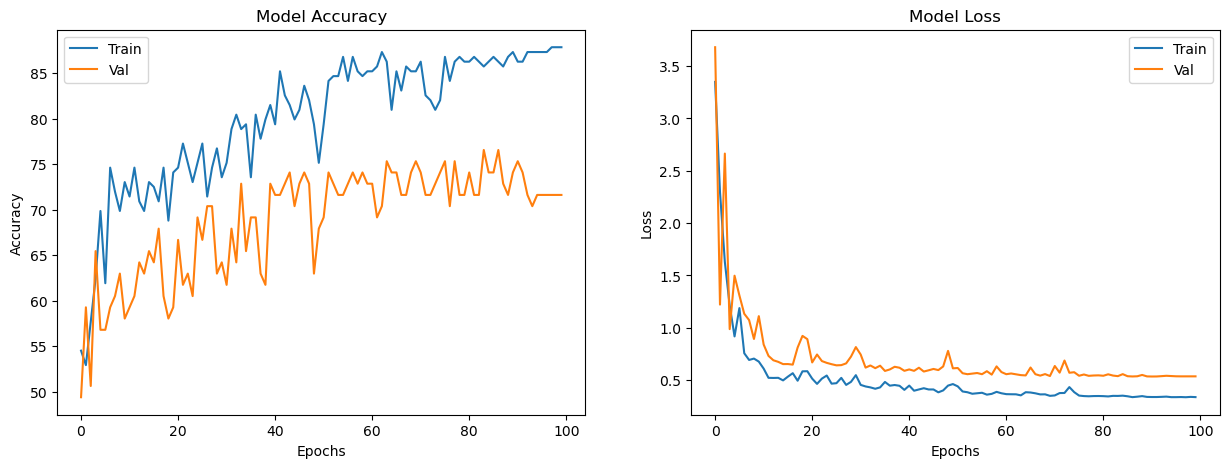

In [70]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plotting training and validation accuracy
ax[0].plot(train_accuracies)
ax[0].plot(val_accuracies)
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train', 'Val'])

# Plotting training and validation loss
ax[1].plot(train_losses)
ax[1].plot(val_losses)
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train', 'Val'])

plt.show()

## D. Evaluating Your Trained Model

In [16]:
# read test file
test_data = pd.read_csv('heart_dataset_test.csv')
test_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,50,0,2,120,219,0,1,158,0,1.6,1,0,2,1
1,58,0,2,120,340,0,1,172,0,0.0,2,0,2,1
2,66,0,3,150,226,0,1,114,0,2.6,0,0,2,1
3,43,1,0,150,247,0,1,171,0,1.5,2,0,2,1
4,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1


In [17]:
test_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [18]:
test_data = test_data.values
test_data.shape

(31, 14)

In [19]:
# Convert to PyTorch tensors
x_test = torch.from_numpy(test_data[:, :13]).float()
y_test = torch.from_numpy(test_data[:, 13]).long()

# Create datasets
test_dataset = TensorDataset(x_test, y_test)

# Create dataloaders
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [75]:
# Load the trained weights
model.load_state_dict(torch.load('model_classification.pth'))

# Set the model to evaluation mode
model.eval()

test_correct = 0
test_total = 0

with torch.no_grad():
    for features, labels in test_loader:

        features = features.cuda()
        labels = labels.cuda()

        outputs = model(features)

        predicted = outputs.argmax(-1)
        test_correct += (predicted == labels).sum().item()
        test_total += labels.size(0)

print(f'Test accuracy is {100. * test_correct / test_total}%')

Test accuracy is 64.51612903225806%


## E. Hyperparameter Select and Experiments

Select 2 hyper-parameters of the artificial neural network used in Lab 2 and set 3 different values for each. Perform experiments to compare the effects of varying these hyper-parameters on the loss and accuracy metrics across the training, validation, and test datasets. Present your findings with appropriate tables.

**Hyperparameter**
- `hidden_units` = { 256, 512, 1024 }
- `hidden_layers` = { 5, 10, 50 }

In [21]:
import torch.nn as nn

class Model(nn.Module):
    def __init__(self, input_size=13, hidden_units=256, hidden_layers=2, num_classes=2):
        super().__init__()
        layers = []
        # First hidden layer
        layers.append(nn.Linear(input_size, hidden_units))
        layers.append(nn.ReLU())
        # Additional hidden layers if any
        for _ in range(hidden_layers - 1):
            layers.append(nn.Linear(hidden_units, hidden_units))
            layers.append(nn.ReLU())
        # Output layer
        layers.append(nn.Linear(hidden_units, num_classes))
        self.model = nn.Sequential(*layers).cuda()
    
    def forward(self, x):
        return self.model(x)


Starting training: hidden_units=256, hidden_layers=5


(units=256, layers=5): 100%|██████████| 100/100 [00:02<00:00, 41.10it/s]



Starting training: hidden_units=256, hidden_layers=10


(units=256, layers=10): 100%|██████████| 100/100 [00:03<00:00, 27.39it/s]



Starting training: hidden_units=256, hidden_layers=50


(units=256, layers=50): 100%|██████████| 100/100 [00:12<00:00,  7.96it/s]



Starting training: hidden_units=512, hidden_layers=5


(units=512, layers=5): 100%|██████████| 100/100 [00:02<00:00, 39.64it/s]



Starting training: hidden_units=512, hidden_layers=10


(units=512, layers=10): 100%|██████████| 100/100 [00:03<00:00, 27.02it/s]



Starting training: hidden_units=512, hidden_layers=50


(units=512, layers=50): 100%|██████████| 100/100 [00:14<00:00,  7.12it/s]



Starting training: hidden_units=1024, hidden_layers=5


(units=1024, layers=5): 100%|██████████| 100/100 [00:02<00:00, 34.61it/s]



Starting training: hidden_units=1024, hidden_layers=10


(units=1024, layers=10): 100%|██████████| 100/100 [00:05<00:00, 19.57it/s]



Starting training: hidden_units=1024, hidden_layers=50


(units=1024, layers=50): 100%|██████████| 100/100 [00:19<00:00,  5.21it/s]



===== Experiment Results =====
   hidden_units  hidden_layers  Train Loss  Train Accuracy (%)  Val Loss  \
0           256              5    0.295435           88.359788  0.606111   
1           256             10    0.389270           81.481481  0.642875   
2           256             50    0.687095           55.555556  0.692756   
3           512              5    0.366607           81.481481  0.670063   
4           512             10    0.408209           80.423280  0.654072   
5           512             50    0.687215           55.555556  0.692780   
6          1024              5    0.412891           78.835979  0.771486   
7          1024             10    0.456427           78.835979  0.619544   
8          1024             50    0.686733           55.555556  0.692835   

   Val Accuracy (%)  Test Loss  Test Accuracy (%)  
0         76.543210   0.704958          70.967742  
1         67.901235   0.674297          70.967742  
2         51.851852   0.702848          48.387097  

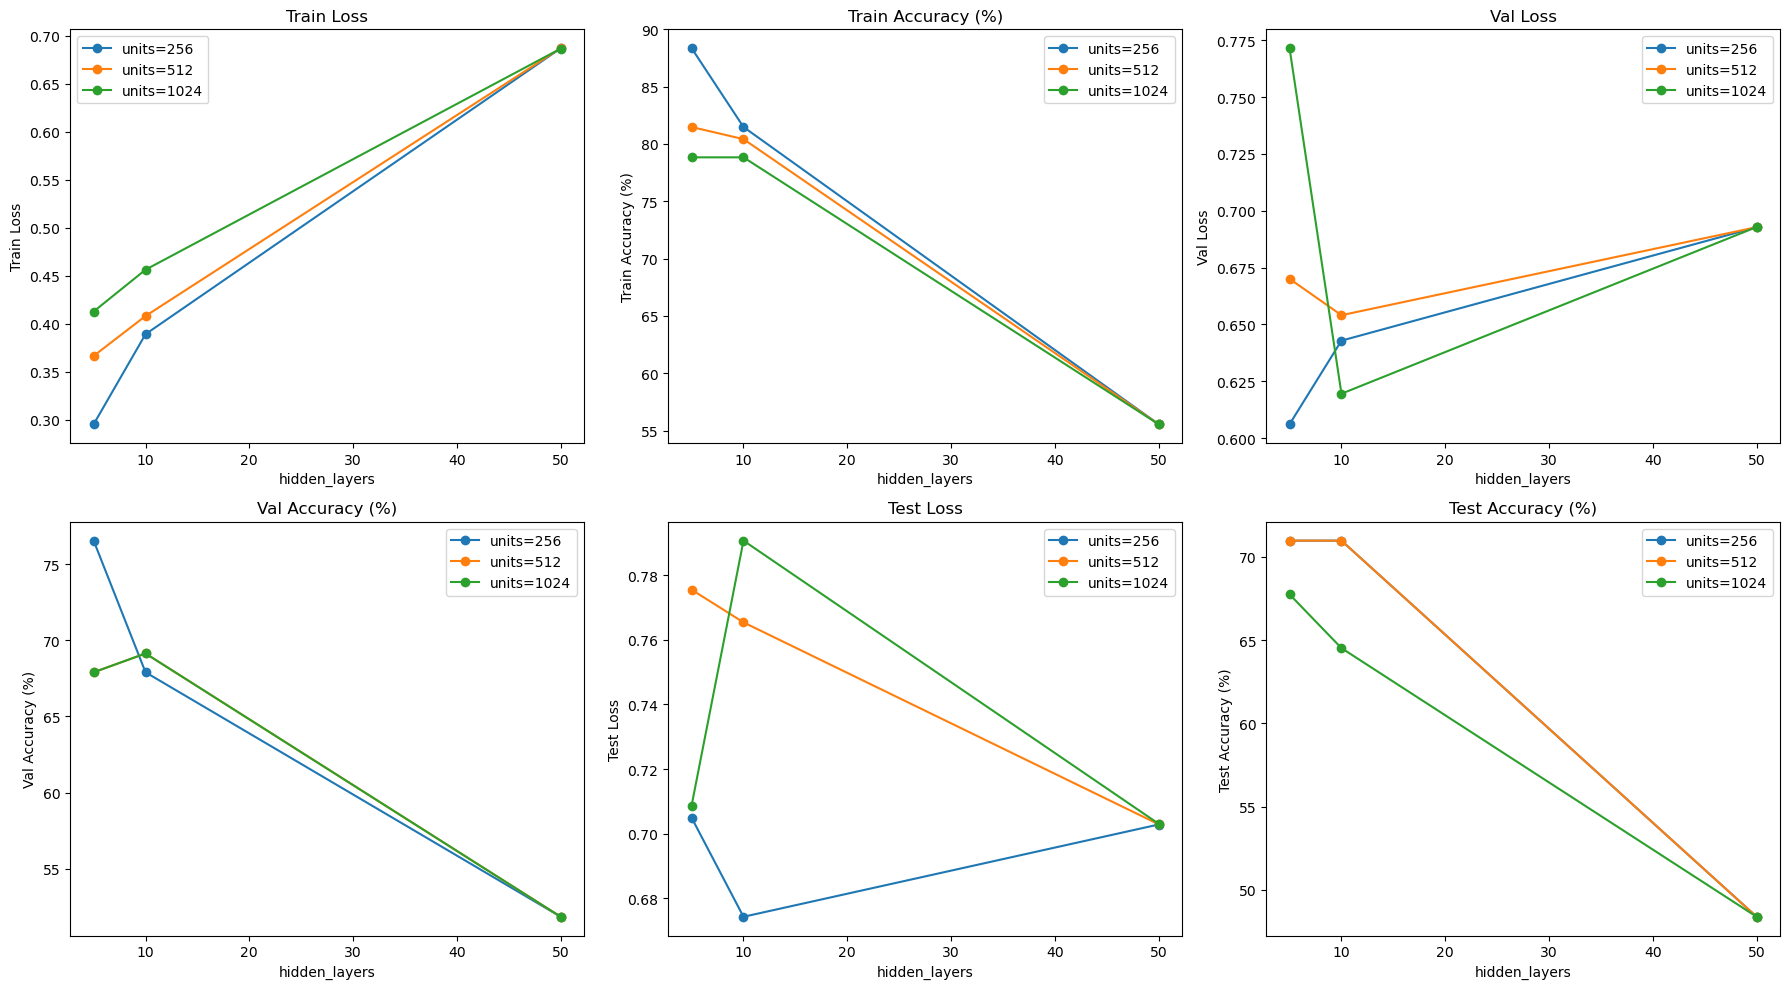

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR
from tqdm.auto import tqdm
import pandas as pd
import matplotlib.pyplot as plt

epochs = 100  # training epochs configuration

# Store experiment results
results = []

# Enumerate the nine combinations
hidden_units_options = [256, 512, 1024]
hidden_layers_options = [5, 10, 50]

for hidden_units in hidden_units_options:
    for hidden_layers in hidden_layers_options:
        print(f'\n==================\nStarting training: hidden_units={hidden_units}, hidden_layers={hidden_layers}')
        # Initialize model (ensure Model supports parameters hidden_units and hidden_layers)
        model = Model(hidden_units=hidden_units, hidden_layers=hidden_layers).cuda()
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=1e-3)
        lr_scheduler = CosineAnnealingLR(optimizer, T_max=epochs, eta_min=0)
        
        best_val_loss = float('inf')
        best_val_acc = -1
        
        # Record metrics from the last epoch (optionally record every epoch)
        for epoch in tqdm(range(epochs), desc=f'(units={hidden_units}, layers={hidden_layers})'):
            # Training phase
            model.train()
            total_loss = 0.0
            train_correct = 0
            total_train_samples = 0

            for features, labels in train_loader:
                features = features.cuda()
                labels = labels.cuda()

                outputs = model(features)
                loss = criterion(outputs, labels)
                total_loss += loss.item()
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                train_pred = outputs.argmax(dim=-1)
                train_correct += (train_pred == labels).sum().item()
                total_train_samples += labels.size(0)
            
            lr_scheduler.step()
            avg_train_loss = total_loss / len(train_loader)
            train_accuracy = 100. * train_correct / total_train_samples

            # Validation phase
            model.eval()
            total_val_loss = 0.0
            correct_val = 0
            total_val_samples = 0
            with torch.no_grad():
                for features, labels in val_loader:
                    features = features.cuda()
                    labels = labels.cuda()
                    outputs = model(features)
                    loss = criterion(outputs, labels)
                    total_val_loss += loss.item()
                    pred_val = outputs.argmax(dim=-1)
                    correct_val += (pred_val == labels).sum().item()
                    total_val_samples += labels.size(0)
            avg_val_loss = total_val_loss / len(val_loader)
            val_accuracy = 100. * correct_val / total_val_samples
            
            # Save best validation performance (adjust checkpoint saving condition as necessary)
            if avg_val_loss < best_val_loss:
                best_val_loss = avg_val_loss
            if val_accuracy > best_val_acc:
                best_val_acc = val_accuracy
                torch.save(model.state_dict(), 'model_classification.pth')
            
            # print(f'Epoch {epoch+1}/{epochs}, Train loss: {avg_train_loss:.4f}, Train acc: {train_accuracy:.2f}%, '
            #       f'Val loss: {avg_val_loss:.4f}, Val acc: {val_accuracy:.2f}%')
        
        # Testing phase
        model.eval()
        total_test_loss = 0.0
        test_correct = 0
        total_test_samples = 0
        with torch.no_grad():
            for features, labels in test_loader:
                features = features.cuda()
                labels = labels.cuda()
                outputs = model(features)
                loss = criterion(outputs, labels)
                total_test_loss += loss.item()
                pred_test = outputs.argmax(dim=-1)
                test_correct += (pred_test == labels).sum().item()
                total_test_samples += labels.size(0)
        avg_test_loss = total_test_loss / len(test_loader)
        test_accuracy = 100. * test_correct / total_test_samples

        # Save the final performance for this hyperparameter configuration (using last epoch metrics)
        results.append({
           'hidden_units': hidden_units,
           'hidden_layers': hidden_layers,
           'Train Loss': avg_train_loss,
           'Train Accuracy (%)': train_accuracy,
           'Val Loss': avg_val_loss,
           'Val Accuracy (%)': val_accuracy,
           'Test Loss': avg_test_loss,
           'Test Accuracy (%)': test_accuracy
        })
        
# Create a result table
df_results = pd.DataFrame(results)
print("\n===== Experiment Results =====")
print(df_results)
df_results.to_csv("experiment_results.csv", index=False)

# Plot charts for each metric as a function of hidden_layers, with different lines for each hidden_units
metrics = ["Train Loss", "Train Accuracy (%)", "Val Loss", "Val Accuracy (%)", "Test Loss", "Test Accuracy (%)"]
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.ravel()

for ax, metric in zip(axs, metrics):
    for hidden_units in hidden_units_options:
        subset = df_results[df_results["hidden_units"] == hidden_units]
        ax.plot(subset["hidden_layers"], subset[metric], marker='o', label=f"units={hidden_units}")
    ax.set_title(metric)
    ax.set_xlabel("hidden_layers")
    ax.set_ylabel(metric)
    ax.legend()
    
plt.tight_layout()
plt.show()